In [120]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from LinearRegression import plotRegression
%matplotlib inline
from sklearn import linear_model

In [109]:
# experiment_data = pandas.read_excel("data/expSet.xlsx")
# evaluation_set = pandas.read_excel("data/evalSet.xlsx")

EXPERIMENT_DATA = pickle.load(open('EXPERIMENT_SET_pandas.pkl', 'rb'))
EVALUATION_SET = pickle.load(open('EVALUATION_SET_pandas.pkl', 'rb'))
#EXPERIMENT_DATA = EXPERIMENT_DATA[EXPERIMENT_DATA["GRAD"] == "YES"]


In [110]:
# graduated = experiment_data[experiment_data["GRAD"] == "YES"]
graduated = EXPERIMENT_DATA[EXPERIMENT_DATA["GRAD"] == "YES"]

In [111]:
print("Experiment_Data values {}\n".format(EXPERIMENT_DATA.columns.values))
print("Evaluation_Set values {}".format(EVALUATION_SET.columns.values))

Experiment_Data values ['YEAR' 'EXPERIMENT' 'LOCATION' 'VARIETY' 'FAMILY' 'CHECK' 'RM' 'REPNO'
 'YIELD' 'CLASS_OF' 'GRAD' 'BAGSOLD']

Evaluation_Set values ['CLASS_OF' 'VARIETY' 'FAMILY' 'RM']


In [112]:
print("Shape of Experiment data: {}\nShape of Evaluation Set:{}"
      .format(experiment_data.shape, evaluation_set.shape))

Shape of Experiment data: (258253, 12)
Shape of Evaluation Set:(38, 4)


In [113]:
EXPERIMENT_DATA.head()

,YEAR,EXPERIMENT,LOCATION,VARIETY,FAMILY,CHECK,RM,REPNO,YIELD,CLASS_OF,GRAD,BAGSOLD
0,2009,09YT000052,3210,V000016,FAM05619,True,3.9,1,50.302327,.,.,.
1,2009,09YT000052,3210,V000016,FAM05619,True,3.9,2,48.331305,.,.,.
2,2009,09YT000052,3210,V000018,FAM05619,True,3.7,1,53.103246,.,.,.
3,2009,09YT000052,3210,V000018,FAM05619,True,3.7,2,53.103246,.,.,.
4,2009,09YT000052,3210,V000039,FAM05625,True,3.4,1,58.081136,.,.,.


In [114]:
print("The number of unique locations that we have is {}."
      .format(len(set(EXPERIMENT_DATA['LOCATION']))))
print("The number of unique yields that we have is {}."
      .format(len(set(np.floor(EXPERIMENT_DATA['YIELD'])))))

The number of unique locations that we have is 152.
The number of unique yields that we have is 107.


In [115]:
from sklearn.neighbors import KNeighborsRegressor
X = pd.to_numeric(graduated['LOCATION']).reshape(-1,1)
Y = graduated['YIELD']
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=100, p=2,
          weights='uniform')

In [116]:
predictions = knn.predict(X)

In [117]:
print("Mean Squared Error is: {} ".format(np.sum((predictions - Y)**2)/ len(Y)))

Mean Squared Error is: 100.06027816663513 


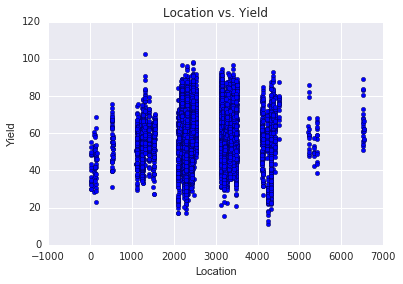

In [121]:
plt.xlabel("Location")
plt.ylabel("Yield")
plt.title("Location vs. Yield")
plt.scatter(X, Y)

